<a href="https://colab.research.google.com/github/Incidio/Group/blob/master/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

D = pd.read_csv("/content/classification.csv", encoding='utf-8')

D = D.rename(columns={'A': 'Adventure', 'C': 'Culture', 'E': 'Enviorenment','H': 'Health'})
D = D.rename(columns={'N': 'Nature', 'R': 'Religion', 'SP': 'Sport','S   H': 'Shopping', 'B': 'Bussiness', 'L': 'Leisure'})

Locations = D['Place names']
D = D.drop(['Place names'],axis =1)
D = D.drop(['ID'],axis =1)


#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#D[['Latitude','Longitude']] = scaler.fit_transform(D[['Latitude','Longitude']])

D = D.drop(['Place names.1'],axis =1)

D = D.fillna(0)
D.head(n = 5)


,City,Latitude,Longitude,Adventure,Culture,Enviorenment,Health,Nature,Religion,Sport,Shopping,Bussiness,Leisure
0,Baghdad,33.379507,44.339878,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Baghdad,33.252217,44.495281,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Baghdad,33.371865,44.358385,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Baghdad,33.351238,44.361236,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Baghdad,33.337880,44.410124,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
'''
Q1 = D['Latitude'].quantile(0.20)
Q3 = D['Latitude'].quantile(0.80)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(D['Latitude']>=upper)[0]
lower_array = np.where(D['Latitude']<=lower)[0]

# Removing the outliers
D.drop(index=upper_array, inplace=True)
D.drop(index=lower_array, inplace=True)

print("New Shape: ", D.shape)
'''

'\nQ1 = D[\'Latitude\'].quantile(0.25)\nQ3 = D[\'Latitude\'].quantile(0.75)\nIQR = Q3 - Q1\nlower = Q1 - 1.5*IQR\nupper = Q3 + 1.5*IQR\n \n# Create arrays of Boolean values indicating the outlier rows\nupper_array = np.where(D[\'Latitude\']>=upper)[0]\nlower_array = np.where(D[\'Latitude\']<=lower)[0]\n \n# Removing the outliers\nD.drop(index=upper_array, inplace=True)\nD.drop(index=lower_array, inplace=True)\n \nprint("New Shape: ", D.shape)\n'

In [ ]:
'''
Q1 = D['Longitude'].quantile(0.20)
Q3 = D['Longitude'].quantile(0.80)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(D['Longitude']>=upper)[0]
lower_array = np.where(D['Longitude']<=lower)[0]

# Removing the outliers
D.drop(index=upper_array, inplace=True)
D.drop(index=lower_array, inplace=True)

print("New Shape: ", D.shape)
'''

'\nQ1 = D[\'Longitude\'].quantile(0.25)\nQ3 = D[\'Longitude\'].quantile(0.75)\nIQR = Q3 - Q1\nlower = Q1 - 1.5*IQR\nupper = Q3 + 1.5*IQR\n \n# Create arrays of Boolean values indicating the outlier rows\nupper_array = np.where(D[\'Longitude\']>=upper)[0]\nlower_array = np.where(D[\'Longitude\']<=lower)[0]\n \n# Removing the outliers\nD.drop(index=upper_array, inplace=True)\nD.drop(index=lower_array, inplace=True)\n \nprint("New Shape: ", D.shape)\n'

In [ ]:
X = D.drop(['City'],axis =1) #
y = D['City'] # target

<Axes: xlabel='Longitude', ylabel='Latitude'>

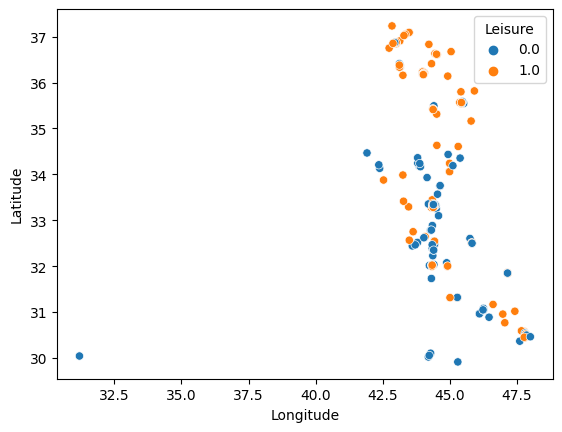

In [ ]:
import seaborn as sns

sns.scatterplot(data = X, x = 'Longitude', y = 'Latitude', hue = 'Leisure')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<Axes: >

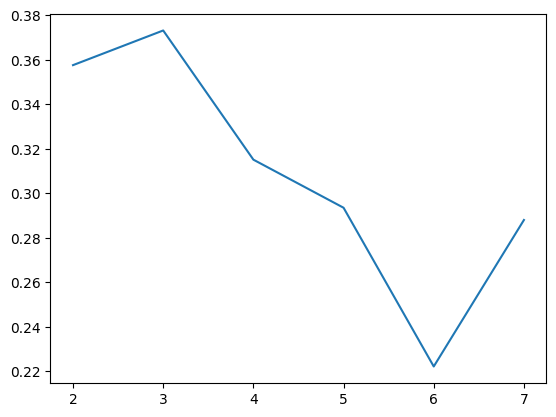

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

K = range(2, 8)
fits = []
score = []


for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train)

    fits.append(model)

    score.append(metrics.silhouette_score(X_train, model.labels_, metric='euclidean'))

sns.lineplot(x = K, y = score)

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train)
X_train = pd.DataFrame(X_train)

<Axes: xlabel='Longitude', ylabel='Latitude'>

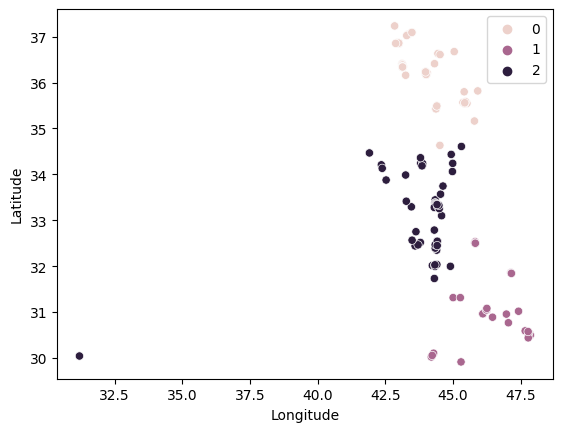

In [ ]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)